# Run the whole deltas algorithm

In [16]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [17]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}

dataset = datasets[0]  # change ind to select dataset to use
model = 'SVM-rbf'

data_clf = data.get_real_dataset(dataset, scale=True, seed=0)
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

Breast Cancer: 569
Number of attribues: 30
Classes total: 357 - 212

Classes train: 178 - 17
Classes test:  179 - 195


## Get Classifier

In [18]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data
plotting training data as data input


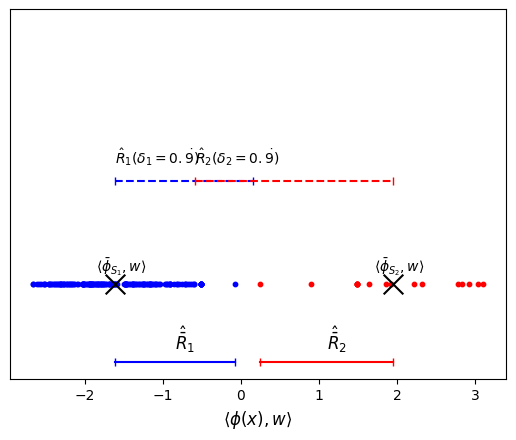

Budget 97 found 76 viable downsampled solutions
Best solution found by removing 22 data points
Downsampled Data:


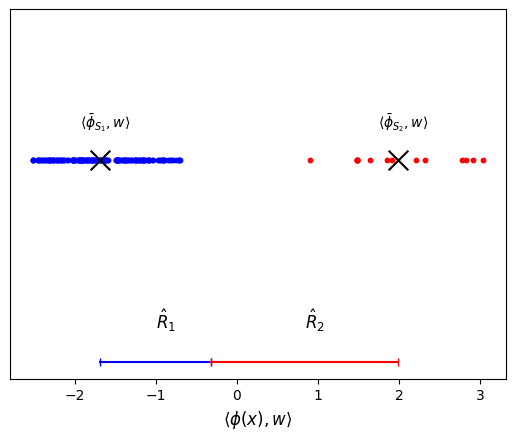

In [19]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=1,
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=10000, 
                                                     method='supports-prop-update_mean',
                                                     parallel=True)

## Plot training data information

plotting training data as data input


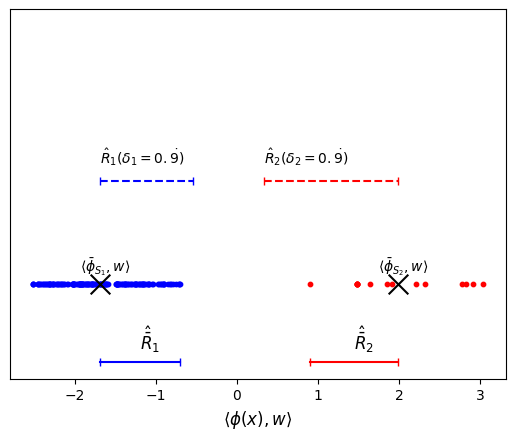

In [20]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [21]:
deltas_model.print_params()

Parameters
                R:  3.04387410047001
                N1: 158
                N2: 15
                R1: 0.982369078951773
                R2: 1.0922303772915039
                M:  1.599170669486478
                D:  3.673770125729755
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean        F1
Method                                        
Baseline          0.919786  0.919866  0.916667
SMOTE             0.756684  0.730297  0.695652
Balanced Weights  0.927807  0.928345  0.926027
BMR               0.933155  0.933700  0.931507
Threshold         0.959893  0.960739  0.960212
Our Method        0.957219  0.956600  0.959391 


Baseline


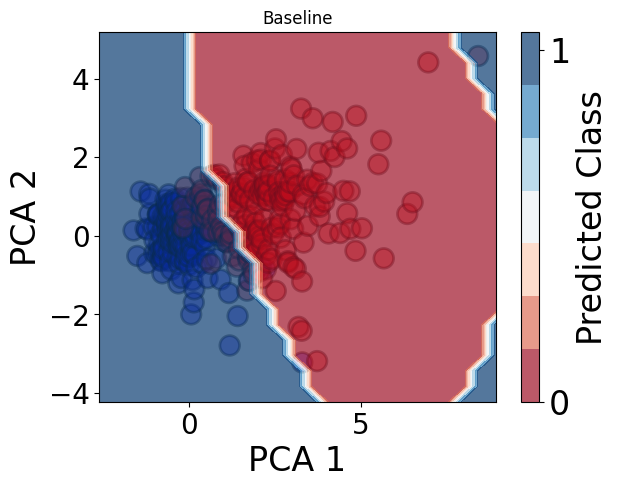

SMOTE


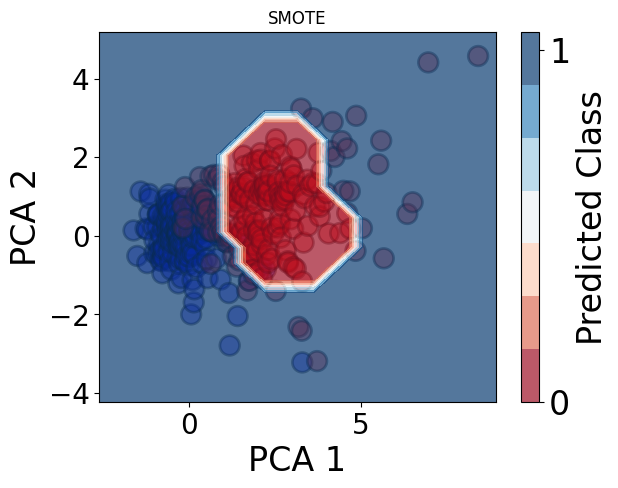

Balanced Weights


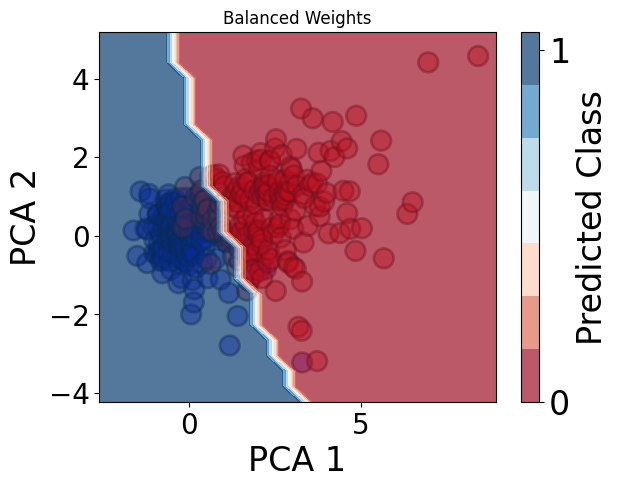

BMR


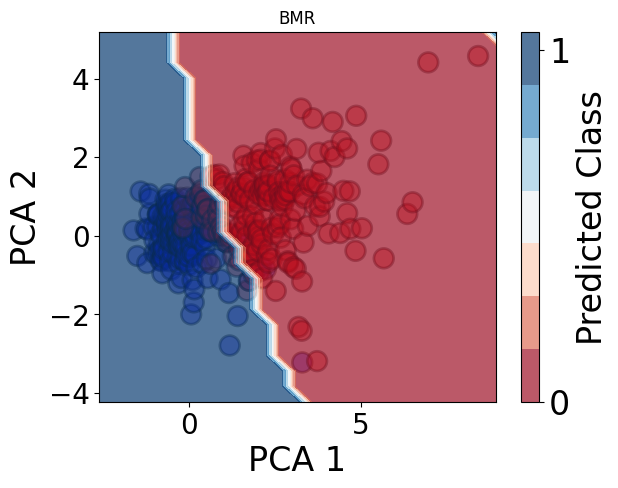

Threshold


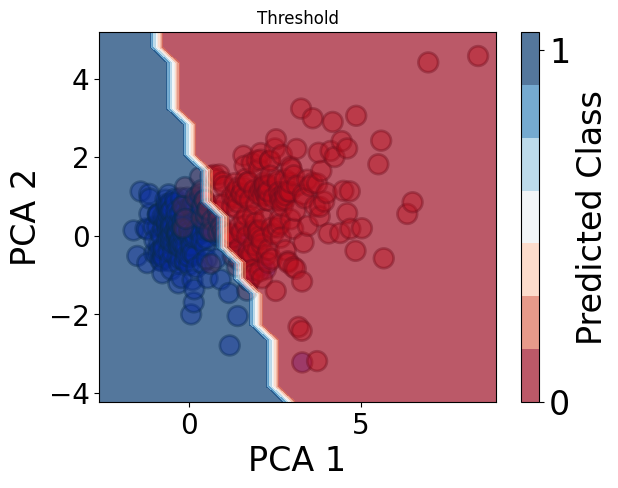

Our Method


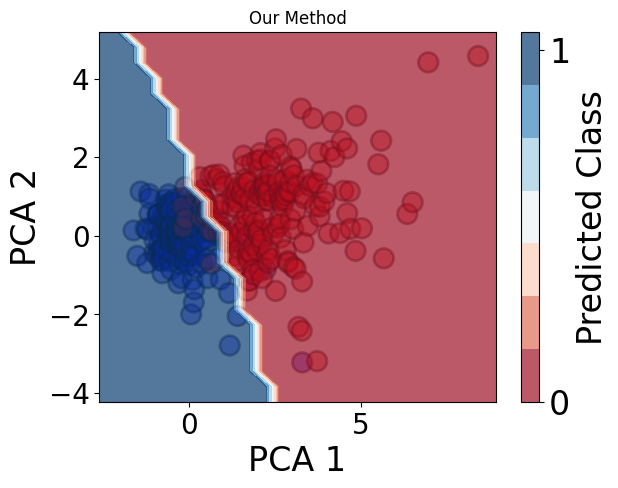

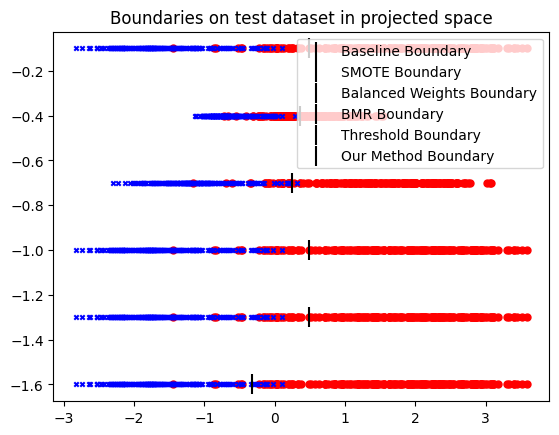

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.919786,0.919866,0.916667
SMOTE,0.756684,0.730297,0.695652
Balanced Weights,0.927807,0.928345,0.926027
BMR,0.933155,0.933700,0.931507
Threshold,0.959893,0.960739,0.960212
Our Method,0.957219,0.956600,0.959391


In [22]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])